In [ ]:
# Central Limit Theorem (CLT)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

In [2]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Shapir-Wilk p-value :  1.9867612763291298e-11
Data may not be normal distribution


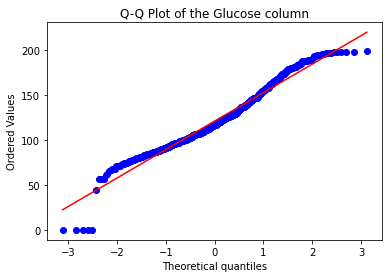

In [ ]:
# Shapiro test on Glucose Col
shapiro_test = stats.shapiro(df['Glucose'])
print('Shapir-Wilk p-value : ', shapiro_test.pvalue)

if(shapiro_test.pvalue < 0.05):
    print("Data may not be normal distribution")
else:
    print("Data may be Normally distributed")    

# Generate a QQ plot for the original column
stats.probplot(df['Glucose'], dist='norm', plot=plt)
plt.title('Q-Q Plot of the Glucose column')
plt.show()



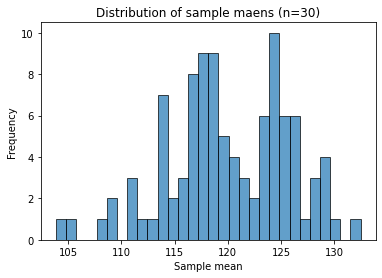

In [5]:
# Central Limit Theorem
sample_means = []
n_samples = 100
sample_size = 30

for _ in range(n_samples):
    sample = df['Glucose'].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())

# Plot the distribution of sample maeans
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of sample maens (n=30)')
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.show()

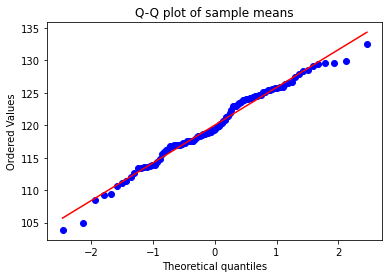

In [6]:
# Generate a QQ plot for sample means
stats.probplot(sample_means, dist='norm', plot=plt)
plt.title('Q-Q plot of sample means')
plt.show()

In [7]:
# Perform the shapiro wilk test on the sample means
shapiro_test = stats.shapiro(sample_means)
print('Shapiro wilk p-value :', shapiro_test.pvalue)

Shapiro wilk p-value : 0.22921296954154968


In [10]:
# Interpret the result:
if(shapiro_test.pvalue < 0.05):
    print("Data may not be normal distribution")
else:
    print("Data may be Normally distributed")   

Data may be Normally distributed
